In [1]:
!nvidia-smi

Mon Mar  1 04:31:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.4.1


In [3]:
!pip uninstall tensorflow
!pip install -q tensorflow==2.3.0

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 320.4MB 14kB/s 
     |████████████████████████████████| 460kB 39.8MB/s 
     |████████████████████████████████| 20.1MB 68kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [4]:
# clone the official TensorFlow model garden repository
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 507), reused 1382 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 24.63 MiB/s, done.
Resolving deltas: 100% (507/507), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [5]:
# install requirements to use tensorflow/models repository
# restart runtime if this cell is executed
!pip install -Uqr models/official/requirements.txt

     |████████████████████████████████| 71kB 5.2MB/s 
     |████████████████████████████████| 225kB 12.4MB/s 
     |████████████████████████████████| 15.3MB 222kB/s 
     |████████████████████████████████| 9.9MB 41.9MB/s 
     |████████████████████████████████| 296kB 42.0MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 27.4MB 123kB/s 
     |████████████████████████████████| 174kB 49.9MB/s 
     |████████████████████████████████| 3.7MB 20.3MB/s 
     |████████████████████████████████| 706kB 47.4MB/s 
     |████████████████████████████████| 358kB 53.3MB/s 
     |████████████████████████████████| 1.2MB 52.7MB/s 
     |████████████████████████████████| 11.6MB 54.1MB/s 
     |████████████████████████████████| 37.6MB 84kB/s 
     |████████████████████████████████| 645kB 37.5MB/s 
     |████████████████████████████████| 2.2MB 45.2MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 51kB 5.9MB/

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization
import matplotlib.pyplot as plt

In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.11.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip).

In [3]:
df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
                 compression='zip', low_memory=False)
df.shape

(1306122, 3)

In [4]:
df.tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


<AxesSubplot:title={'center':'Target distribution'}, ylabel='Frequency'>

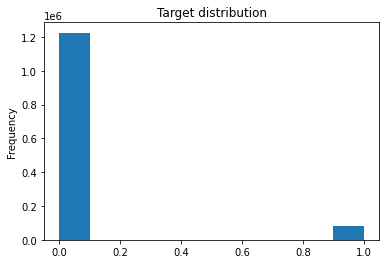

In [5]:
df.target.plot(kind='hist', title='Target distribution')

## Create tf.data.Datasets for Training and Evaluation

In [6]:
# select ~10,000 for train_df and ~1,000 for valid_df
train_df, remaining = train_test_split(df, random_state=42, train_size=0.0075, stratify=df['target'].values) 
valid_df, _ = train_test_split(remaining, random_state=42, train_size=0.00075, stratify=remaining['target'].values)
train_df.shape, valid_df.shape

((9795, 3), (972, 3))

In [7]:
# create an input pipeline
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values)) 
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['question_text'].values, valid_df['target'].values))

  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Download a Pre-trained BERT Model from TensorFlow Hub

In [8]:
'''
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- Tokenizing the text is done with the provided BERT model tokenizer
'''

# label categories
label_list = [0, 1]

# set maximum length of (token) input sequences
# BERT max: 512 tokens
max_seq_length = 128

train_batch_size = 32

# get BERT layer and tokenizer
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2', trainable=True)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() # checks BERT layer is uncased
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case) # handles text processing

In [9]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [10]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Tokenize and Preprocess Text for BERT

In [11]:
# function to convert row to input features and label
# creates InputExamples using classifier_data_lib's constructor InputExample provided in BERT library

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None,
                                             text_a =text.numpy(),
                                             text_b = None,
                                             label=label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [12]:
# cannot directly use .map function because graph tensors do not have a value
# wrap above function in a tf.py_function to pass regular tensors to the wrapped python function 

def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], 
                                                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
      'input_word_ids': input_ids,
       'input_mask': input_mask,
       'input_type_ids': segment_ids
  }

  return (x, label_id)

## Create a TensorFlow Input Pipeline

In [13]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

In [14]:
# train data specs
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [15]:
# valid data specs
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Add a Classification Head to the BERT Layer

In [16]:
# build the model

def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                          name='input_word_ids')
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name='input_mask')
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                     name='input_type_ids')
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  # add a dropout layer to minimise overtraining [hyperparameter]
  drop = tf.keras.layers.Dropout(0.4)(pooled_output)

  output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(drop)

  model = tf.keras.Model(
      inputs = {
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids
      },
      outputs = output)
  return model

## Fine-Tune BERT for Text Classification

In [17]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

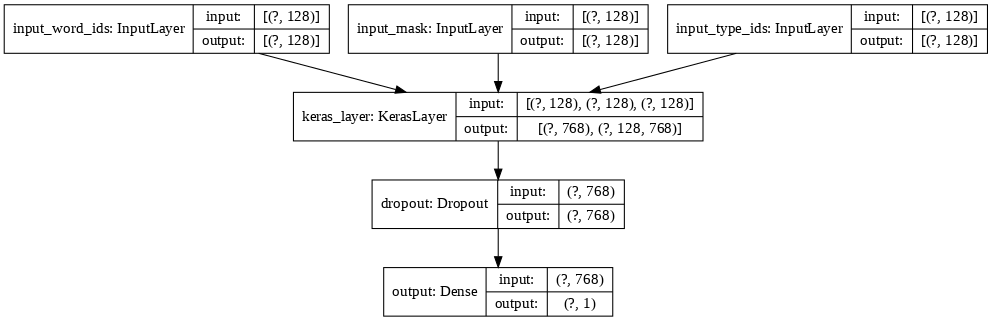

In [18]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

In [19]:
# train the model 
# currently overfitting; can optimize by training on less epochs, switching batch size, modifying model architecture, etc.
epochs = 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

Epoch 1/4
306/306 [==============================] - ETA: 0s - loss: 0.1638 - binary_accuracy: 0.9416WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0160s vs `on_test_batch_end` time: 0.1389s). Check your callbacks.


306/306 [==============================] - 148s 483ms/step - loss: 0.1638 - binary_accuracy: 0.9416 - val_loss: 0.1130 - val_binary_accuracy: 0.9552
Epoch 2/4
306/306 [==============================] - 147s 480ms/step - loss: 0.0894 - binary_accuracy: 0.9659 - val_loss: 0.1660 - val_binary_accuracy: 0.9615
Epoch 3/4
306/306 [==============================] - 147s 481ms/step - loss: 0.0400 - binary_accuracy: 0.9870 - val_loss: 0.1916 - val_binary_accuracy: 0.9552
Epoch 4/4
306/306 [==============================] - 147s 480ms/step - loss: 0.0187 - binary_accuracy: 0.9933 - val_loss: 0.1659 - val_binary_accuracy: 0.9552


## Evaluate the BERT Text Classification Model

In [20]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

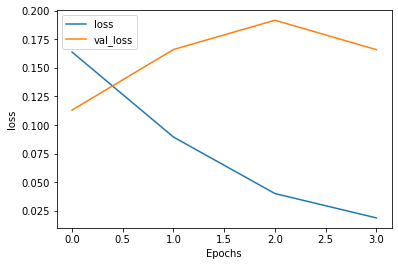

In [21]:
plot_graphs(history, 'loss')

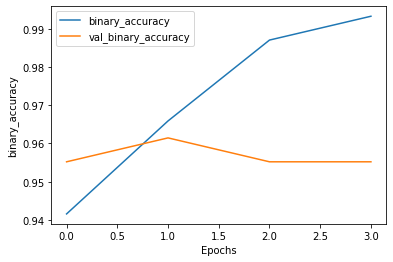

In [22]:
plot_graphs(history, 'binary_accuracy')

In [31]:
# overfitting is apparant by the graphs above and the testing below

sample_example = ['Can I have your email address?',
                  'How long does it take to learn Python?',
                  'What kind of wood is used the most for buildings?',
                  'How can I tell if I am overwatering my plant?',
                  'Why are dogs so irritating?',
                  'What do I need to tell my friend to make them shutup?',
                  'Are you ashamed of being an Indian?', # example from train dataset
                  'Are you ashamed of being an American?']
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
threshold = 0.1 # extrememly low threshold, but all still labelled as Sincere
['Insincere' if pred >= threshold else 'Sincere' for pred in preds]

['Sincere',
 'Sincere',
 'Sincere',
 'Sincere',
 'Sincere',
 'Sincere',
 'Sincere',
 'Sincere']